In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('netflix.csv', sep="\t")

In [96]:
df.head(5)

,show_id,type,title,director,cast_media,country,date_added,release_year,rating,duration,genre,description,clean_date
0,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Davide Gambino,"Silvana Saguto, Pino Maniaci",NaN,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",Thu Sep 23 2021 17:00:00
1,s124,TV Show,Luv Kushh,NaN,NaN,NaN,2021-09-01,2012,TV-Y7,1 Season,Kids' TV,"Based on the last book of the epic Ramayana, t...",Wed Sep 01 2021 17:00:00
2,s219,TV Show,Titletown High,NaN,"Jake Garcia, Lenley Gross, Kendall Haden, Amar...",United States of America,2021-08-26,2021,TV-14,1 Season,"Reality TV, Teen TV Shows",In a Georgia town where football rules and win...,Thu Aug 26 2021 17:00:00
3,s225,TV Show,Motel Makeover,NaN,"April Brown, Sarah Sklash",Canada,2021-08-24,2021,TV-14,1 Season,"International TV Shows, Reality TV","Amid project pitfalls and a pandemic, besties-...",Tue Aug 24 2021 17:00:00
4,s235,TV Show,Oggy Oggy,NaN,Kaycie Chase,"France, Canada, Germany",2021-08-23,2021,TV-Y,1 Season,"Kids' TV, TV Comedies",Join adorable kitten Oggy and his cast of cat ...,Mon Aug 23 2021 17:00:00


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806 entries, 0 to 8805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8806 non-null   object        
 1   type          8806 non-null   object        
 2   title         8806 non-null   object        
 3   director      6810 non-null   object        
 4   cast_media    8508 non-null   object        
 5   country       8534 non-null   object        
 6   date_added    8796 non-null   datetime64[ns]
 7   release_year  8806 non-null   int32         
 8   rating        8802 non-null   object        
 9   duration      8803 non-null   object        
 10  genre         8806 non-null   object        
 11  description   8806 non-null   object        
 12  clean_date    8796 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(11)
memory usage: 860.1+ KB


In [61]:
df['release_year'] = df['release_year'].astype('int32')

In [62]:
df['clean_date'] = df['date_added'].str.extract(r'(\w{3} \w{3} \d{2} \d{4} \d{2}:\d{2}:\d{2})')

In [63]:
df['date_added'] = pd.to_datetime(df['clean_date'], format='%a %b %d %Y %H:%M:%S')

In [64]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'] = df['date_added'].dt.date

In [65]:
df['date_added'] = pd.to_datetime(df['date_added']).dt.normalize()

In [66]:
content_distribution = df['type'].value_counts()

In [67]:
print(content_distribution)

type
Movie      6130
TV Show    2676
Name: count, dtype: int64


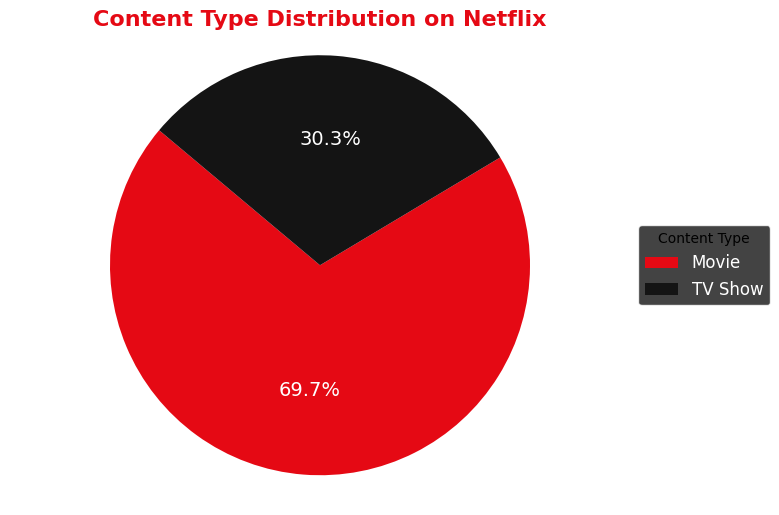

In [125]:
# Netflix color palette
netflix_red = '#E50914'  # Netflix's primary color
netflix_black = '#141414'  # Netflix's background color
netflix_white = '#FFFFFF'  # Netflix's white color
netflix_grey = '#B3B3B3'

# Content type distribution
content_type_distribution = df['type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(content_type_distribution, labels=content_type_distribution.index,
        autopct='%1.1f%%', startangle=140, colors=[netflix_red, netflix_black],
        textprops={'color': netflix_white, 'fontsize': 14})
plt.title('Content Type Distribution on Netflix', color=netflix_red, fontsize=16, weight='bold')
plt.legend(content_type_distribution.index, title="Content Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, facecolor=netflix_black, edgecolor=netflix_white, labelcolor=netflix_white)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.gca().set_facecolor(netflix_black)
plt.show()

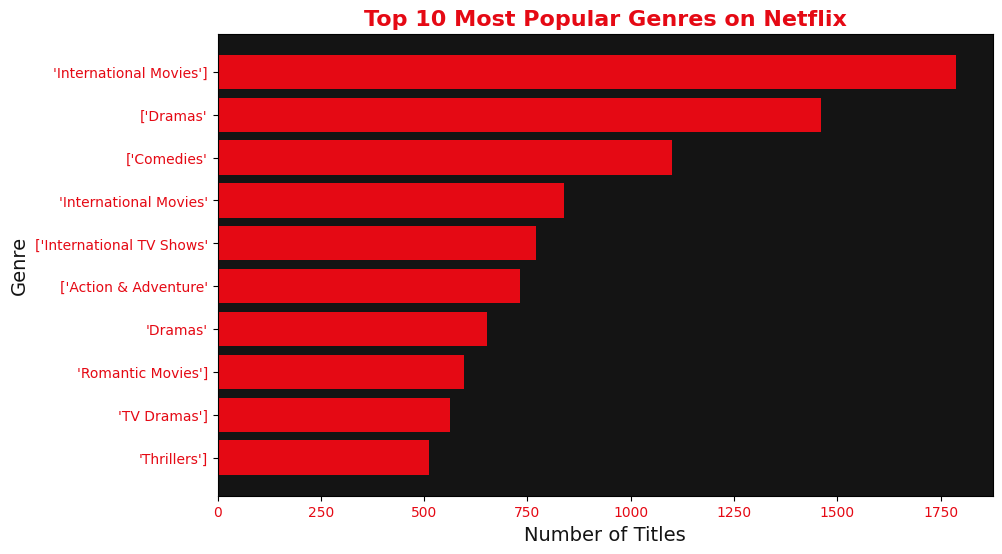

In [40]:
# It appears that some entries in the 'genre' column might not be strings.
# Let's first ensure that all values in the genre column are treated as strings before proceeding.

# Convert all entries in the genre column to string
df['genre'] = df['genre'].astype(str)

# Now, split the genres and explode the list into separate rows
genres = df['genre'].str.split(',').explode().str.strip()

# Count the occurrences of each genre
genre_counts = genres.value_counts().head(10)  # top 10 genres

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(genre_counts.index, genre_counts.values, color=netflix_red)
plt.xlabel('Number of Titles', fontsize=14, color=netflix_black)
plt.ylabel('Genre', fontsize=14, color=netflix_black)
plt.title('Top 10 Most Popular Genres on Netflix', fontsize=16, color=netflix_red, weight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count on top
plt.gca().set_facecolor(netflix_black)
plt.xticks(color=netflix_red)
plt.yticks(color=netflix_red)
plt.show()


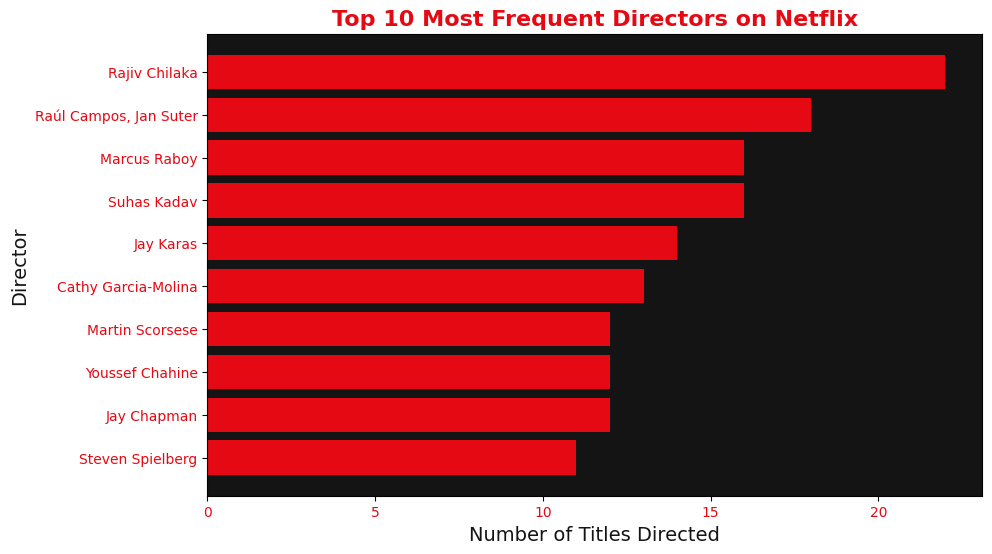

In [47]:
# Director analysis
# Count the occurrences of each director
director_counts = df['director'].value_counts().head(10)  # top 10 directors

# Plotting directors
plt.figure(figsize=(10, 6))
plt.barh(director_counts.index, director_counts.values, color=netflix_red)
plt.xlabel('Number of Titles Directed', fontsize=14, color=netflix_black)
plt.ylabel('Director', fontsize=14, color=netflix_black)
plt.title('Top 10 Most Frequent Directors on Netflix', fontsize=16, color=netflix_red, weight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count on top
plt.gca().set_facecolor(netflix_black)
plt.xticks(color=netflix_red)
plt.yticks(color=netflix_red)
plt.show()

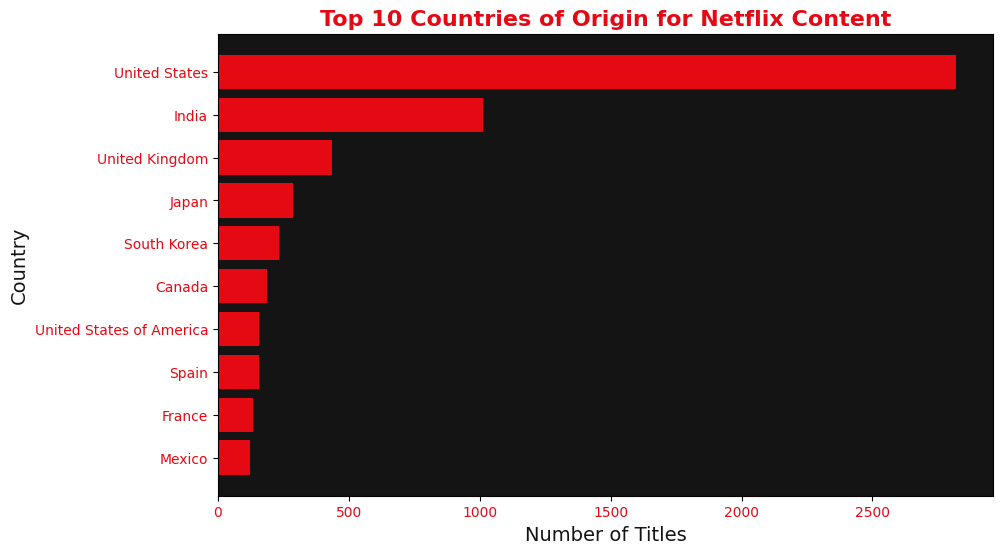

In [53]:
# Country analysis
# Count the occurrences of each country
country_counts = df['country'].value_counts().head(10)  # top 10 countries

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(country_counts.index, country_counts.values, color=netflix_red)
plt.xlabel('Number of Titles', fontsize=14, color=netflix_black)
plt.ylabel('Country', fontsize=14, color=netflix_black)
plt.title('Top 10 Countries of Origin for Netflix Content', fontsize=16, color=netflix_red, weight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count on top
plt.gca().set_facecolor(netflix_black)
plt.xticks(color=netflix_red)
plt.yticks(color=netflix_red)
plt.show()

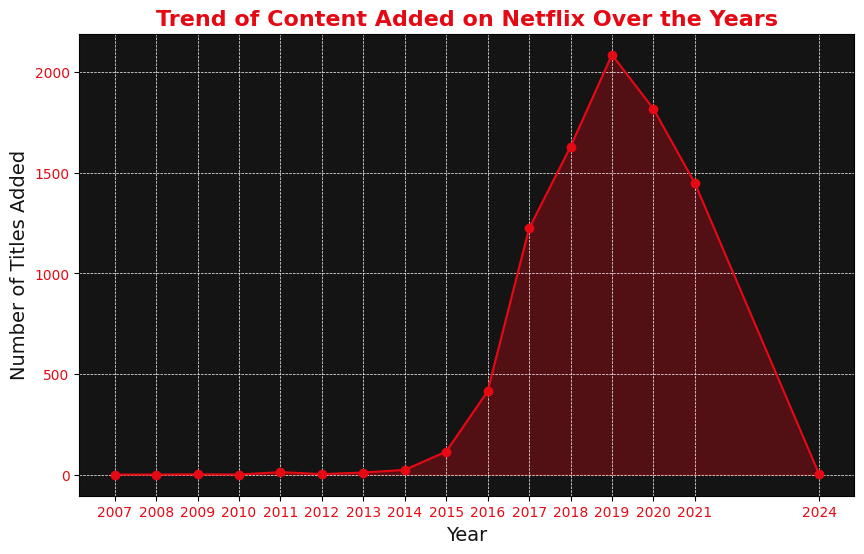

In [79]:
# Convert 'date_added' to datetime format, ignoring errors and NaN values
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows with NaN values in 'date_added'
df_cleaned = df.dropna(subset=['date_added'])

# Extract year from the 'date_added' column
df_cleaned['year_added'] = df_cleaned['date_added'].dt.year

# Count the number of titles added each year
yearly_addition = df_cleaned['year_added'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_addition.index, yearly_addition.values, marker='o', color=netflix_red)
plt.fill_between(yearly_addition.index, yearly_addition.values, color=netflix_red, alpha=0.3)
plt.xlabel('Year', fontsize=14, color=netflix_black)
plt.ylabel('Number of Titles Added', fontsize=14, color=netflix_black)
plt.title('Trend of Content Added on Netflix Over the Years', fontsize=16, color=netflix_red, weight='bold')
plt.gca().set_facecolor(netflix_black)
plt.xticks(ticks=yearly_addition.index, labels=yearly_addition.index, color=netflix_red)
plt.yticks(color=netflix_red)
plt.grid(visible=True, color=netflix_white, linestyle='--', linewidth=0.5)
plt.show()

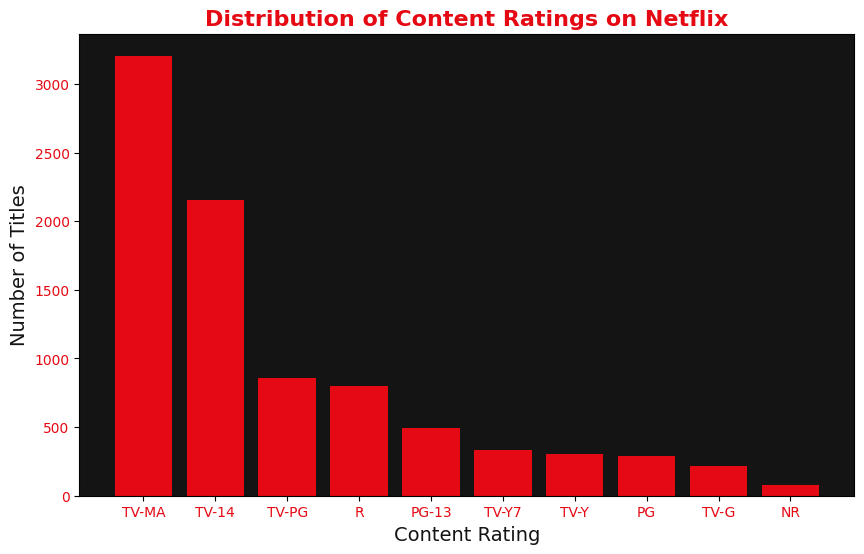

In [83]:
# Content rating distribution
rating_counts = df['rating'].value_counts().head(10)  # top 10 content ratings
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color=netflix_red)
plt.xlabel('Content Rating', fontsize=14, color=netflix_black)
plt.ylabel('Number of Titles', fontsize=14, color=netflix_black)
plt.title('Distribution of Content Ratings on Netflix', fontsize=16, color=netflix_red, weight='bold')
plt.gca().set_facecolor(netflix_black)
plt.xticks(color=netflix_red)
plt.yticks(color=netflix_red)
plt.show()


<ipython-input-87-af71520ee790>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration_min'] = movies_data['duration'].str.extract('(\d+)').astype(float)


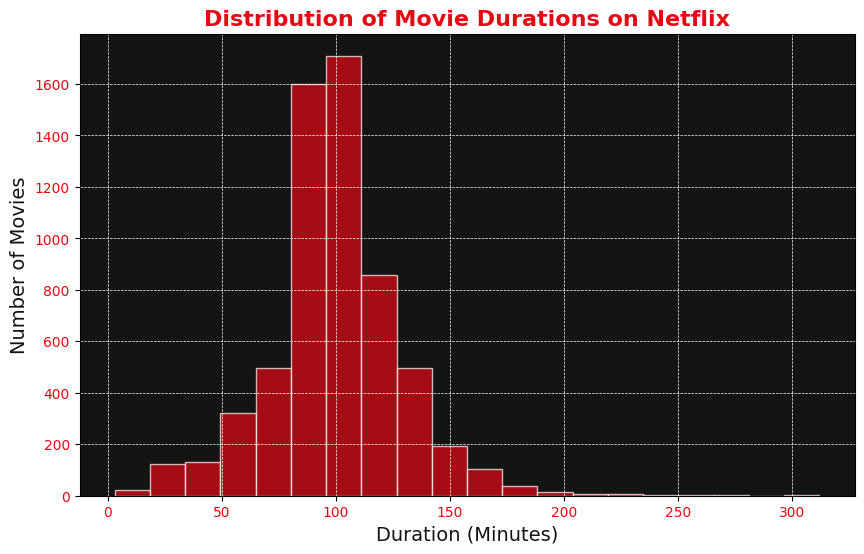

In [87]:
# Filter the dataset to include only movies
movies_data = df[df['type'] == 'Movie']

# Convert the 'duration' column to numeric values (only consider minutes)
# Handle potential errors and non-numeric data gracefully
movies_data['duration_min'] = movies_data['duration'].str.extract('(\d+)').astype(float)

# Plotting the distribution of movie durations
plt.figure(figsize=(10, 6))
plt.hist(movies_data['duration_min'].dropna(), bins=20, color=netflix_red, edgecolor=netflix_white, alpha=0.7)
plt.xlabel('Duration (Minutes)', fontsize=14, color=netflix_black)
plt.ylabel('Number of Movies', fontsize=14, color=netflix_black)
plt.title('Distribution of Movie Durations on Netflix', fontsize=16, color=netflix_red, weight='bold')
plt.gca().set_facecolor(netflix_black)
plt.xticks(color=netflix_red)
plt.yticks(color=netflix_red)
plt.grid(visible=True, color=netflix_white, linestyle='--', linewidth=0.5)
plt.show()


<ipython-input-89-528e1267438c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['seasons'] = tv_shows_data['duration'].str.extract('(\d+)').astype(float)


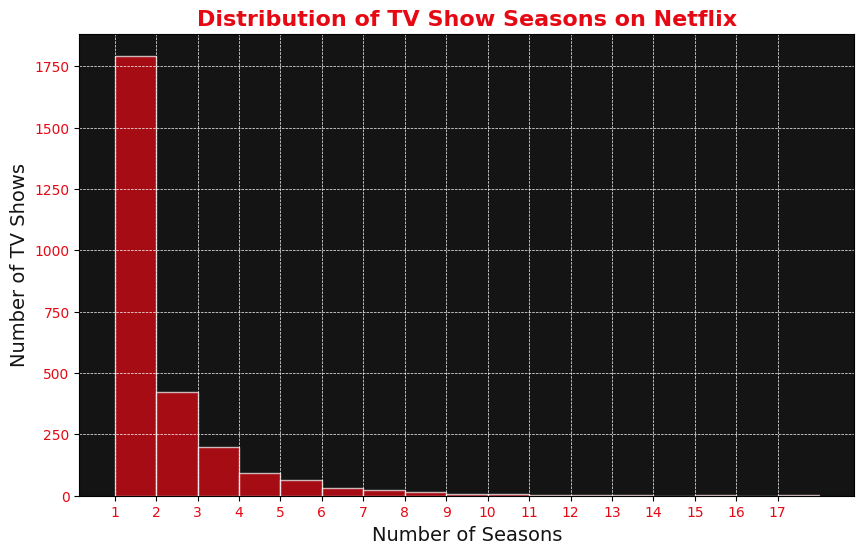

In [89]:
# Filter the dataset to include only TV Shows
tv_shows_data = df[df['type'] == 'TV Show']

# Convert the 'duration' column to numeric values (only consider seasons)
tv_shows_data['seasons'] = tv_shows_data['duration'].str.extract('(\d+)').astype(float)

# Plotting the distribution of TV show seasons
plt.figure(figsize=(10, 6))
plt.hist(tv_shows_data['seasons'].dropna(), bins=range(1, int(tv_shows_data['seasons'].max()) + 2),
         color=netflix_red, edgecolor=netflix_white, alpha=0.7)
plt.xlabel('Number of Seasons', fontsize=14, color=netflix_black)
plt.ylabel('Number of TV Shows', fontsize=14, color=netflix_black)
plt.title('Distribution of TV Show Seasons on Netflix', fontsize=16, color=netflix_red, weight='bold')
plt.gca().set_facecolor(netflix_black)
plt.xticks(range(1, int(tv_shows_data['seasons'].max()) + 1), color=netflix_red)
plt.yticks(color=netflix_red)
plt.grid(visible=True, color=netflix_white, linestyle='--', linewidth=0.5)
plt.show()
# Convert 'date_added' to datetime format, ignoring errors and NaN values
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Drop rows with NaN values in 'date_added'
data_cleaned = data.dropna(subset=['date_added'])

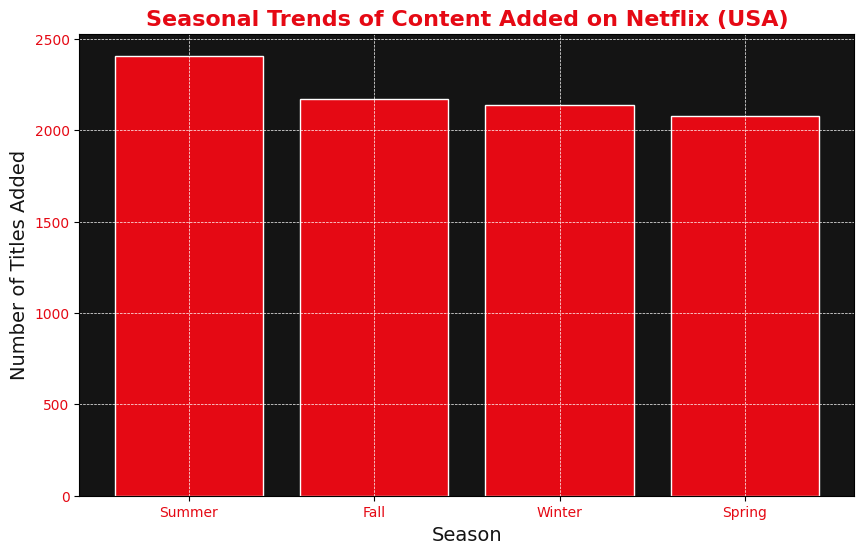

In [120]:
# Convert 'date_added' to datetime format, ignoring errors and NaN values
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows with NaN values in 'date_added'
data_cleaned = df.dropna(subset=['date_added'])

# Extract the month from 'date_added'
data_cleaned['month_added'] = data_cleaned['date_added'].dt.month

# Define a function to map months to seasons
def map_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a 'season' column
data_cleaned['season_added'] = data_cleaned['month_added'].apply(map_to_season)

# Count the number of titles added in each season
season_counts = data_cleaned['season_added'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(season_counts.index, season_counts.values, color=netflix_red, edgecolor=netflix_white)
plt.xlabel('Season', fontsize=14, color=netflix_black)
plt.ylabel('Number of Titles Added', fontsize=14, color=netflix_black)
plt.title('Seasonal Trends of Content Added on Netflix (USA)', fontsize=16, color=netflix_red, weight='bold')
plt.gca().set_facecolor(netflix_black)
plt.xticks(color=netflix_red)
plt.yticks(color=netflix_red)
plt.grid(visible=True, color=netflix_white, linestyle='--', linewidth=0.5)
plt.show()


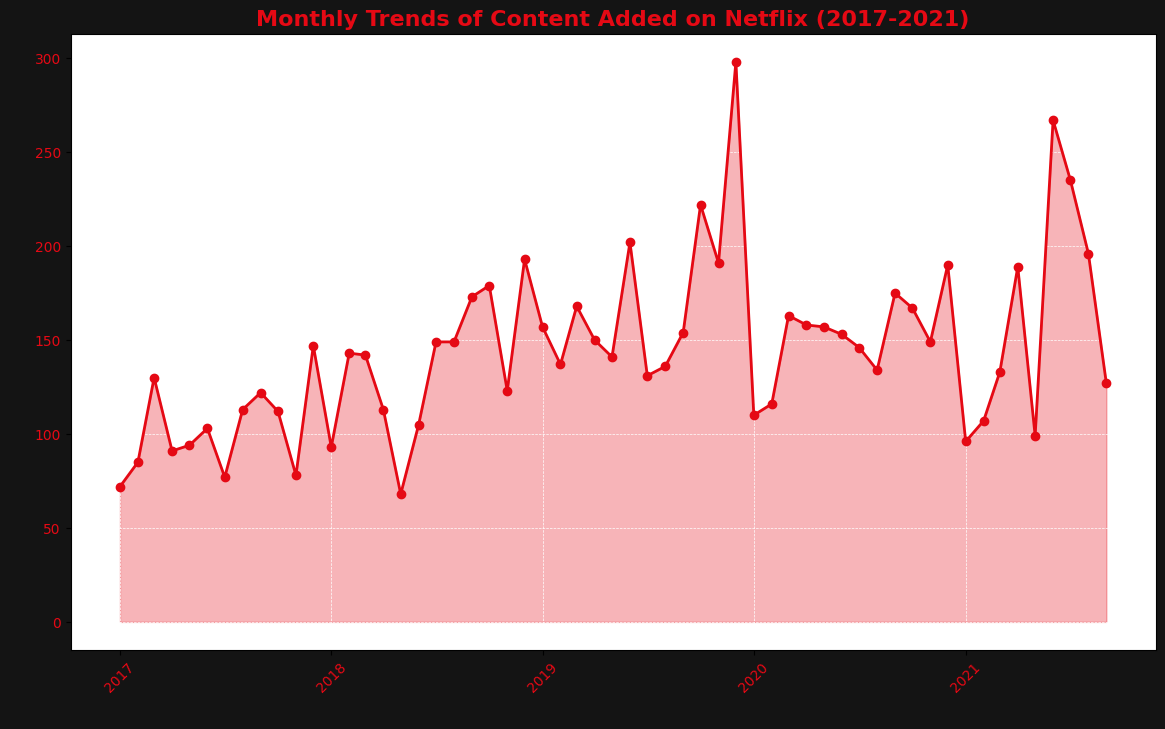

In [118]:
# Filter the data for the years 2017 to 2021
data_cleaned = data_cleaned[(data_cleaned['date_added'].dt.year >= 2017) & (data_cleaned['date_added'].dt.year <= 2021)]

# Extract the month and year from 'date_added'
data_cleaned['year_month_added'] = data_cleaned['date_added'].dt.to_period('M')

# Count the number of titles added each month
monthly_trends = data_cleaned['year_month_added'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(monthly_trends.index.to_timestamp(), monthly_trends.values, marker='o', color='#E50914', linestyle='-', linewidth=2)
plt.fill_between(monthly_trends.index.to_timestamp(), monthly_trends.values, color='#E50914', alpha=0.3)

plt.xlabel('Date', fontsize=14, color=netflix_black)
plt.ylabel('Number of Titles Added', fontsize=14, color=netflix_black)
plt.title('Monthly Trends of Content Added on Netflix (2017-2021)', fontsize=16, color=netflix_red, weight='bold')

plt.gca().set_facecolor('#141414')
plt.xticks(color=netflix_red, rotation=45)
plt.yticks(color=netflix_red)

plt.grid(visible=True, color=netflix_white, linestyle='--', linewidth=0.5)
plt.show()

<ipython-input-113-06ce5382939d>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends = data_filtered.groupby(['year_added', 'month_added']).size().reset_index(name='count')


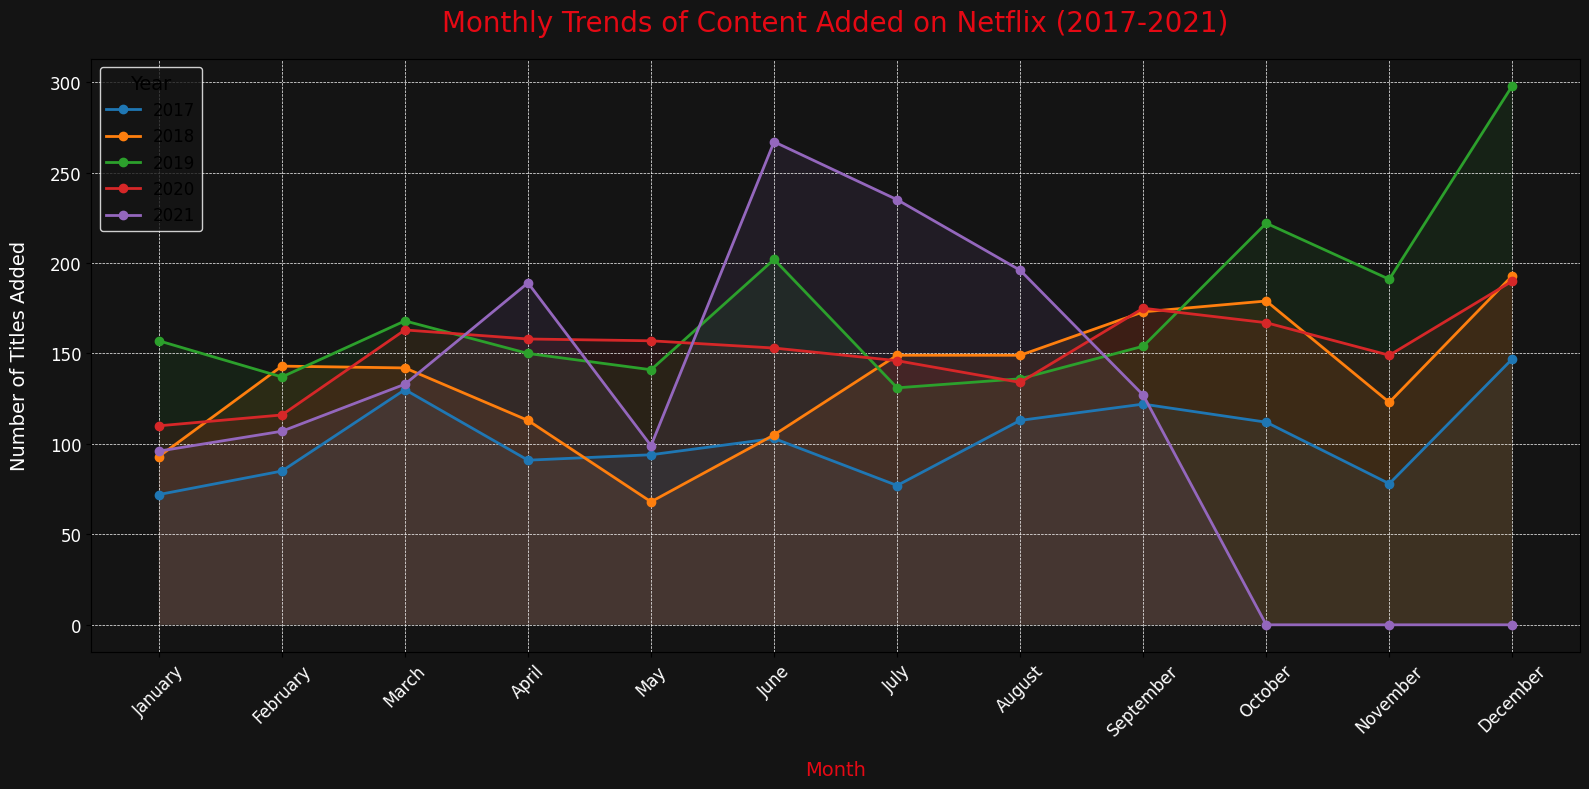

In [113]:
# Filter the data for the years 2017 to 2021 and drop rows with NaN in 'date_added'
data_filtered = df.dropna(subset=['date_added'])
data_filtered = data_filtered[(data_filtered['date_added'].dt.year >= 2017) & (data_filtered['date_added'].dt.year <= 2021)]

# Extract year and month from 'date_added'
data_filtered['year_added'] = data_filtered['date_added'].dt.year
data_filtered['month_added'] = data_filtered['date_added'].dt.month_name()

# Create an ordered categorical type for months to ensure correct order in plots
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
data_filtered['month_added'] = pd.Categorical(data_filtered['month_added'], categories=months_order, ordered=True)

# Group by year and month to get counts
monthly_trends = data_filtered.groupby(['year_added', 'month_added']).size().reset_index(name='count')

# Pivot the table to have months as x-axis and years as different lines
monthly_trends_pivot = monthly_trends.pivot(index='month_added', columns='year_added', values='count')

# Plotting
plt.figure(figsize=(16, 8))
for year in monthly_trends_pivot.columns:
    plt.plot(monthly_trends_pivot.index, monthly_trends_pivot[year], marker='o', linewidth=2, label=str(year))

# Fill area under the curves for aesthetic appeal
for year in monthly_trends_pivot.columns:
    plt.fill_between(monthly_trends_pivot.index, monthly_trends_pivot[year], alpha=0.1)

# Customize plot
plt.title('Monthly Trends of Content Added on Netflix (2017-2021)', fontsize=20, color=netflix_red, pad=20)
plt.xlabel('Month', fontsize=14, color=netflix_red, labelpad=15)
plt.ylabel('Number of Titles Added', fontsize=14, color=netflix_white, labelpad=15)
plt.xticks(fontsize=12, color=netflix_white, rotation=45)
plt.yticks(fontsize=12, color=netflix_white)
plt.legend(title='Year', title_fontsize=14, fontsize=12, facecolor=netflix_black, edgecolor=netflix_white)
plt.grid(visible=True, color=netflix_white, linestyle='--', linewidth=0.5)
plt.gca().set_facecolor(netflix_black)
plt.gcf().patch.set_facecolor(netflix_black)
plt.tight_layout()
plt.show()


<ipython-input-108-ba919f59d643>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends = data_filtered.groupby(['year_added', 'month_added']).size().reset_index(name='count')


AttributeError: 'RangeIndex' object has no attribute 'to_timestamp'

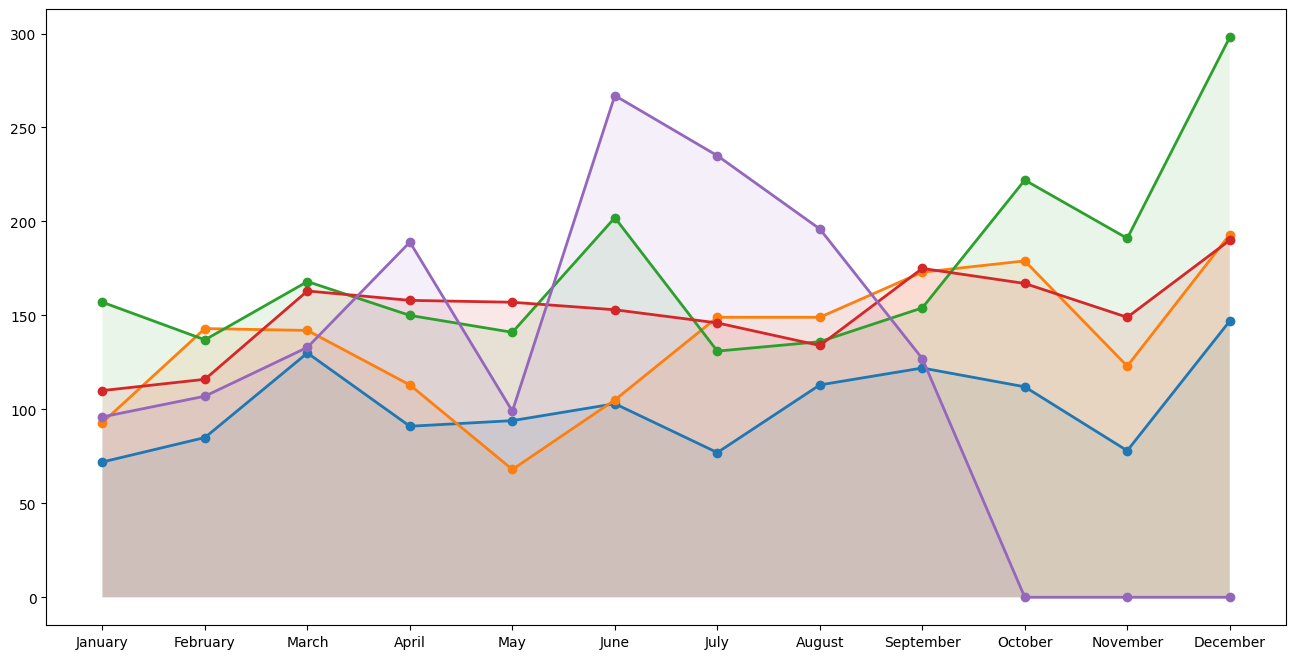

<Figure size 1400x800 with 0 Axes>

In [108]:
# Filter the data for the years 2017 to 2021 and drop rows with NaN in 'date_added'
data_filtered = df.dropna(subset=['date_added'])
data_filtered = data_filtered[(data_filtered['date_added'].dt.year >= 2017) & (data_filtered['date_added'].dt.year <= 2021)]

# Extract year and month from 'date_added'
data_filtered['year_added'] = data_filtered['date_added'].dt.year
data_filtered['month_added'] = data_filtered['date_added'].dt.month_name()

# Create an ordered categorical type for months to ensure correct order in plots
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
data_filtered['month_added'] = pd.Categorical(data_filtered['month_added'], categories=months_order, ordered=True)

# Group by year and month to get counts
monthly_trends = data_filtered.groupby(['year_added', 'month_added']).size().reset_index(name='count')

# Pivot the table to have months as x-axis and years as different lines
monthly_trends_pivot = monthly_trends.pivot(index='month_added', columns='year_added', values='count')

# Plotting
plt.figure(figsize=(16, 8))
for year in monthly_trends_pivot.columns:
    plt.plot(monthly_trends_pivot.index, monthly_trends_pivot[year], marker='o', linewidth=2, label=str(year))

# Fill area under the curves for aesthetic appeal
for year in monthly_trends_pivot.columns:
    plt.fill_between(monthly_trends_pivot.index, monthly_trends_pivot[year], alpha=0.1)

# Customize plot
# Customize plot
plt.figure(figsize=(14, 8))  # Match figure size from reference code

plt.plot(monthly_trends.index.to_timestamp(), monthly_trends.values, marker='o', color='#E50914', linestyle='-', linewidth=2)
plt.fill_between(monthly_trends.index.to_timestamp(), monthly_trends.values, color='#E50914', alpha=0.3)

plt.title('Monthly Trends of Content Added on Netflix (2017-2021)', fontsize=16, color='#E50914', weight='bold', pad=20)  # Adjusted fontsize and color
plt.xlabel('Date', fontsize=14, color='#FFFFFF', labelpad=15)  # Changed color to match Netflix white
plt.ylabel('Number of Titles Added', fontsize=14, color='#FFFFFF', labelpad=15)  # Changed color to match Netflix white

plt.xticks(fontsize=12, color='#E50914', rotation=45)  # Changed color to match Netflix red
plt.yticks(fontsize=12, color='#E50914')  # Changed color to match Netflix red

plt.grid(visible=True, color='#FFFFFF', linestyle='--', linewidth=0.5)  # Changed color to match Netflix white
plt.gca().set_facecolor('#141414')  # Changed to Netflix black
plt.gcf().patch.set_facecolor('#141414')  # Changed to Netflix black

plt.tight_layout()
plt.show()